In [ ]:
#Before execution, Try the below command and compile in command prompt.
#GCC compiler is required for preparAtion.

#cd ../../utils
#gcc -cpp -fPIC -shared lib_cvtIntegralImage45.c -lm -o lib_cvtIntegralImage45.so -O3 std=c99

In [ ]:
!which python

/home/me/anaconda3/bin/python


In [ ]:
!gcc -cpp -fPIC -shared ./utils/lib_cvtIntegralImage45.c -lm -o ./utils/lib_cvtIntegralImage45.so -O3 -std=c99

In [ ]:
from utils.SeparabilityFilter import *

In [ ]:
import cv2
from PIL import Image
import PIL.ImageOps
from scipy import stats
import h5py

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time


import glob
import os.path as osp
from PIL import Image

def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result
def add_margin(cv_gray_img, top, right, bottom, left):
    height, width = cv_gray_img.shape
    new_width = width + right + left
    new_height = height + top + bottom
    result = np.zeros((new_height, new_width), dtype=np.uint8)
    result[top:-bottom, left:-right] = cv_gray_img
    return result

def pil2cv(image):
    ''' PIL型 -> OpenCV型 '''
    new_image = np.array(image)
    if new_image.ndim == 2:  # モノクロ
        pass
    elif new_image.shape[2] == 3:  # カラー
        new_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    elif new_image.shape[2] == 4:  # 透過
        new_image = cv2.cvtColor(image, cv2.COLOR_RGBA2BGRA)
    return new_image

def cv2pil(image):
    ''' OpenCV型 -> PIL型 '''
    new_image = image.copy()
    if new_image.ndim == 2:  # モノクロ
        pass
    elif new_image.shape[2] == 3:  # カラー
        new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    elif new_image.shape[2] == 4:  # 透過
        new_image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA)
    new_image = Image.fromarray(new_image)
    return new_image

def make_datapath_list(rootpath = "./data/hymenoptera_data/"):
    """
    Returns
    -------
    path_list : list
        データへのパスを格納したリスト
    """
    target_path = osp.join(rootpath+'\\*.avi')
    print(target_path)

    path_list = []  # ここに格納する

    # globを利用してサブディレクトリまでファイルパスを取得する
    for path in glob.glob(target_path):
        path_list.append(path)

    return path_list



In [ ]:
X = cv2.imread('testimages/DSC_3136.JPG') # sample1.png is a gray-scale CG generated face image
X = cv2.cvtColor(X, cv2.COLOR_RGB2GRAY)
print(X.shape)
orgHeight, orgWidth = X.shape[:2]
#size = (orgHeight//2, orgWidth//2)
size = (orgWidth//10, orgHeight//10)

X = cv2.resize(X, size)
print(X.shape)

(3096, 5504)
(309, 550)


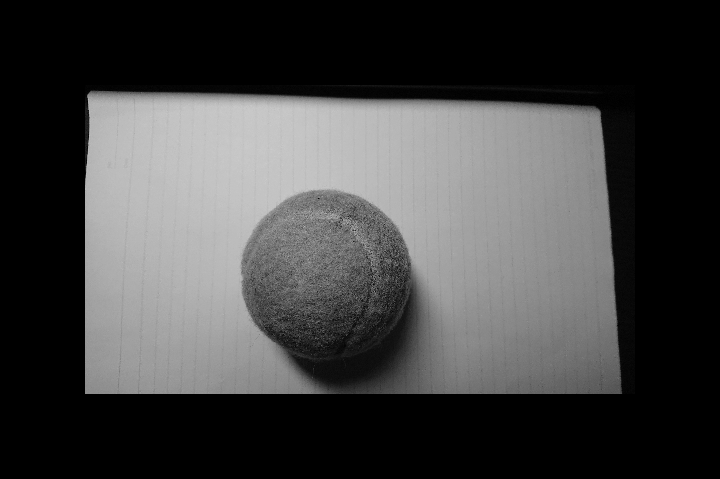

In [ ]:
# x = add_margin(X, height//2, width//2, height//2, width//2)
nR = 85
x = add_margin(X, nR, nR, nR, nR)
X = x
cv2pil(x)

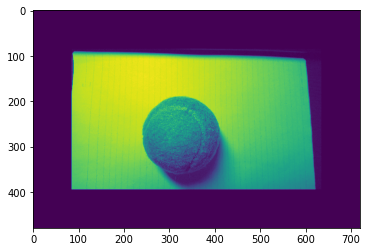

In [ ]:
plt.imshow(X)

In [ ]:
%%time
X = X.astype(np.float64)
H, W = X.shape
%time I1 = cvtIntegralImage(X)                 # calculate integral image
%time P1 = cvtIntegralImage(X**2)    # calculate integral image of squared pixel value
%time I2 = cvtIntegralImage45(X)               # calculate 45 degrees integral image
%time P2 = cvtIntegralImage45(X**2)  # calculate 45 degrees integral image of squared pixel value
#nR = 30      # filter size parameter
#nTH = 0.10 # threshold for finding local peaks
#nR = 30      # filter size parameter
nTH = 0.145 # threshold for finding local peaks

P = np.zeros((H,W,4), np.float64)
%time P[:,:,0:2] =  cvtCombSimpRectFilter(I1,P1,nR)   # apply vertical and horizontal rectangular filters
%time P[:,:,2:4] = cvtCombSimpRectFilter45(I2,P2,nR)   # apply vertical and horizontal rectangular filters
P[P<=0] = 0#0+1e-7
finalMap1 = stats.gmean(P[:,:,0:4]+1e-8, 2)
%time PL1 = cvtFindLocalPeakX(finalMap1,1,nTH)

CPU times: user 0 ns, sys: 7.3 ms, total: 7.3 ms
Wall time: 6.98 ms
CPU times: user 3.88 ms, sys: 2.73 ms, total: 6.61 ms
Wall time: 6.22 ms
CPU times: user 5.28 ms, sys: 490 µs, total: 5.77 ms
Wall time: 5.34 ms
CPU times: user 4.8 ms, sys: 303 µs, total: 5.1 ms
Wall time: 4.45 ms
CPU times: user 26.5 ms, sys: 0 ns, total: 26.5 ms
Wall time: 26.3 ms
CPU times: user 19.6 ms, sys: 3.54 ms, total: 23.1 ms
Wall time: 23 ms
CPU times: user 4.41 ms, sys: 149 µs, total: 4.56 ms
Wall time: 4.56 ms
CPU times: user 88 ms, sys: 20 ms, total: 108 ms
Wall time: 104 ms


In [ ]:
np.max(finalMap1)

0.15976182946088127

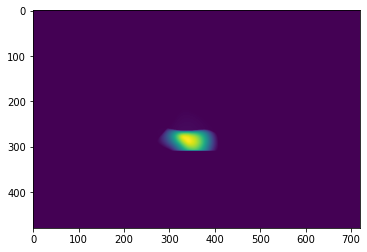

In [ ]:
plt.imshow(finalMap1)

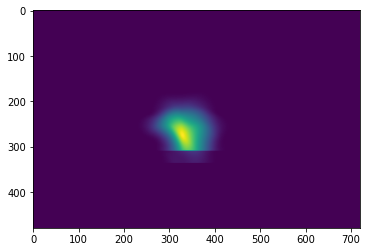

In [ ]:
finalMap2 = np.mean(P[:,:,0:4], 2)
plt.imshow(finalMap2)

In [ ]:
%time PL1 = cvtFindLocalPeakX(finalMap1,1,nTH)

CPU times: user 5.87 ms, sys: 600 µs, total: 6.47 ms
Wall time: 5.07 ms


In [ ]:
PL1

array([[2.85000000e+02, 2.82000000e+02],
       [3.41000000e+02, 3.36000000e+02],
       [1.59761829e-01, 1.58797974e-01]])

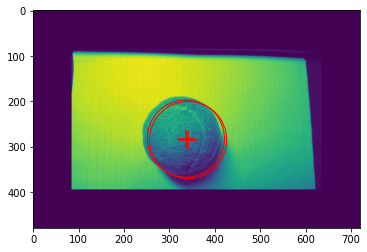

In [ ]:
currentAxis = plt.gca()
for i in range(0, PL1.shape[1]):
    currentAxis.add_patch(plt.Circle(xy=(PL1[1,i], PL1[0,i]), radius=nR, fill=False, edgecolor='r', linewidth=1))
    plt.scatter(PL1[1,i], PL1[0,i], s=300, marker="+", c="r")
plt.imshow(X)

In [ ]:
X = cv2.imread('testimages/DSC_3130.JPG') # sample1.png is a gray-scale CG generated face image
X = cv2.cvtColor(X, cv2.COLOR_RGB2GRAY)
print(X.shape)
orgHeight, orgWidth = X.shape[:2]
#size = (orgHeight//2, orgWidth//2)
size = (orgWidth//10, orgHeight//10)

X = cv2.resize(X, size)
print(X.shape)

(3096, 5504)
(309, 550)


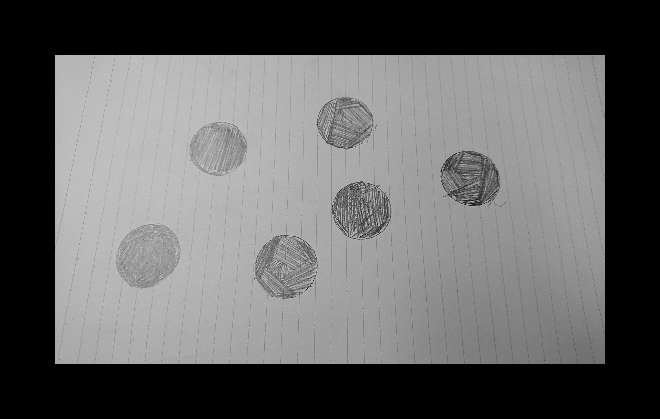

In [ ]:
#x = add_margin(X, height//2, width//2, height//2, width//2)
nR = 55
x = add_margin(X, nR, nR, nR, nR)
X = x
cv2pil(x)

In [ ]:
%%time
X = X.astype(np.float64)
H, W = X.shape
%time I1 = cvtIntegralImage(X)                 # calculate integral image
%time P1 = cvtIntegralImage(np.power(X, 2))    # calculate integral image of squared pixel value
%time I2 = cvtIntegralImage45(X)               # calculate 45 degrees integral image
%time P2 = cvtIntegralImage45(np.power(X, 2))  # calculate 45 degrees integral image of squared pixel value
#nR = 30      # filter size parameter
#nTH = 0.10 # threshold for finding local peaks
nR = 30      # filter size parameter
nTH = 0.40 # threshold for finding local peaks

P = np.zeros((H,W,4), np.float64)
%time P[:,:,0:2] =  cvtCombSimpRectFilter(I1,P1,nR)   # apply vertical and horizontal rectangular filters
%time P[:,:,2:4] = cvtCombSimpRectFilter45(I2,P2,nR)   # apply vertical and horizontal rectangular filters
P[P<=0] = 0#0+1e-7
finalMap1 = stats.gmean(P[:,:,0:4]+1e-8, 2)
%time PL1 = cvtFindLocalPeakX(finalMap1,1,nTH)

CPU times: user 2.5 ms, sys: 0 ns, total: 2.5 ms
Wall time: 2.17 ms
CPU times: user 7.78 ms, sys: 0 ns, total: 7.78 ms
Wall time: 7.11 ms
CPU times: user 1.59 ms, sys: 245 µs, total: 1.83 ms
Wall time: 1.69 ms
CPU times: user 6.02 ms, sys: 0 ns, total: 6.02 ms
Wall time: 5.86 ms
CPU times: user 36.8 ms, sys: 21 µs, total: 36.9 ms
Wall time: 36.9 ms
CPU times: user 38.9 ms, sys: 0 ns, total: 38.9 ms
Wall time: 38.8 ms
CPU times: user 7.06 ms, sys: 0 ns, total: 7.06 ms
Wall time: 7.07 ms
CPU times: user 123 ms, sys: 796 µs, total: 123 ms
Wall time: 120 ms


In [ ]:
np.max(finalMap1)

0.6039687436552589

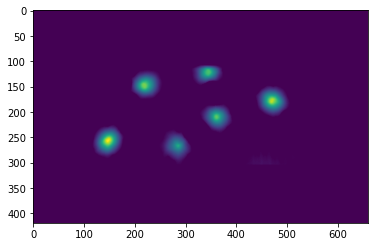

In [ ]:
plt.imshow(finalMap1)

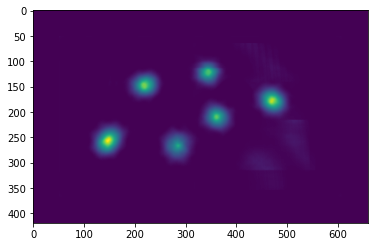

In [ ]:
finalMap2 = np.mean(P[:,:,0:4], 2)
plt.imshow(finalMap2)

In [ ]:
%time PL1 = cvtFindLocalPeakX(finalMap1,1,nTH)

CPU times: user 7.91 ms, sys: 3 ms, total: 10.9 ms
Wall time: 9.41 ms


In [ ]:
PL1

array([[2.56000000e+02, 1.79000000e+02, 1.47000000e+02, 2.09000000e+02,
        1.22000000e+02],
       [1.48000000e+02, 4.70000000e+02, 2.20000000e+02, 3.61000000e+02,
        3.46000000e+02],
       [6.03968744e-01, 5.47527560e-01, 4.81420413e-01, 4.54567338e-01,
        4.33542069e-01]])

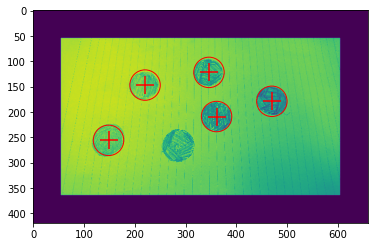

In [ ]:
currentAxis = plt.gca()
for i in range(0, PL1.shape[1]):
    currentAxis.add_patch(plt.Circle(xy=(PL1[1,i], PL1[0,i]), radius=nR, fill=False, edgecolor='r', linewidth=1))
    plt.scatter(PL1[1,i], PL1[0,i], s=300, marker="+", c="r")
plt.imshow(X)

In [ ]:
X = cv2.imread('testimages/DSC_3137.JPG') # sample1.png is a gray-scale CG generated face image
X = cv2.cvtColor(X, cv2.COLOR_RGB2GRAY)
print(X.shape)
orgHeight, orgWidth = X.shape[:2]
#size = (orgHeight//2, orgWidth//2)
size = (orgWidth//10, orgHeight//10)

X = cv2.resize(X, size)
print(X.shape)

(3096, 5504)
(309, 550)


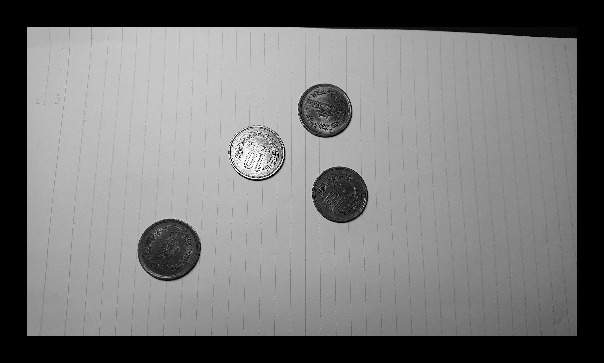

In [ ]:
#x = add_margin(X, height//2, width//2, height//2, width//2)
nR = 27
x = add_margin(X, nR, nR, nR, nR)
X = x
cv2pil(x)

In [ ]:
%%time
X = X.astype(np.float64)
H, W = X.shape
%time I1 = cvtIntegralImage(X)                 # calculate integral image
%time P1 = cvtIntegralImage(np.power(X, 2))    # calculate integral image of squared pixel value
%time I2 = cvtIntegralImage45(X)               # calculate 45 degrees integral image
%time P2 = cvtIntegralImage45(np.power(X, 2))  # calculate 45 degrees integral image of squared pixel value
#nR = 30      # filter size parameter
#nTH = 0.10 # threshold for finding local peaks
#nR = 50      # filter size parameter
nTH = 0.50 # threshold for finding local peaks

P = np.zeros((H,W,4), np.float64)
%time P[:,:,0:2] =  cvtCombSimpRectFilter(I1,P1,nR)   # apply vertical and horizontal rectangular filters
%time P[:,:,2:4] = cvtCombSimpRectFilter45(I2,P2,nR)   # apply vertical and horizontal rectangular filters
P[P<=0] = 0#0+1e-7
finalMap1 = stats.gmean(P[:,:,0:4]+1e-8, 2)
%time PL1 = cvtFindLocalPeakX(finalMap1,1,nTH)

CPU times: user 1.98 ms, sys: 1.23 ms, total: 3.21 ms
Wall time: 3.07 ms
CPU times: user 8.77 ms, sys: 0 ns, total: 8.77 ms
Wall time: 8.37 ms
CPU times: user 1.73 ms, sys: 0 ns, total: 1.73 ms
Wall time: 1.63 ms
CPU times: user 5.46 ms, sys: 0 ns, total: 5.46 ms
Wall time: 5.22 ms
CPU times: user 38.8 ms, sys: 3.68 ms, total: 42.5 ms
Wall time: 42.6 ms
CPU times: user 31.8 ms, sys: 0 ns, total: 31.8 ms
Wall time: 31.6 ms
CPU times: user 7.32 ms, sys: 0 ns, total: 7.32 ms
Wall time: 7.33 ms
CPU times: user 114 ms, sys: 6.64 ms, total: 121 ms
Wall time: 118 ms


In [ ]:
np.max(finalMap1)

0.8713181430081117

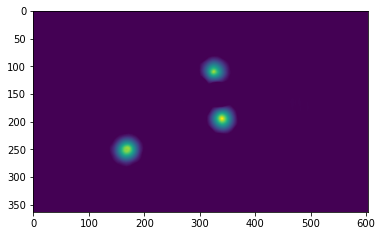

In [ ]:
plt.imshow(finalMap1)

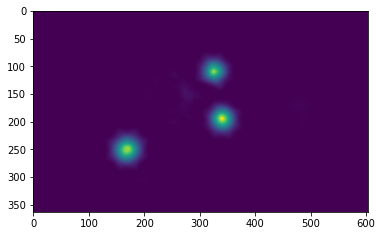

In [ ]:
finalMap2 = np.mean(P[:,:,0:4], 2)
plt.imshow(finalMap2)

In [ ]:
%time PL1 = cvtFindLocalPeakX(finalMap1,1,nTH)

CPU times: user 9.06 ms, sys: 0 ns, total: 9.06 ms
Wall time: 8.04 ms


In [ ]:
PL1

array([[194.        , 110.        , 247.        , 252.        ],
       [340.        , 325.        , 170.        , 170.        ],
       [  0.87131814,   0.75270054,   0.73529905,   0.72714822]])

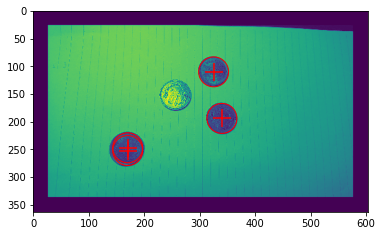

In [ ]:
currentAxis = plt.gca()
for i in range(0, PL1.shape[1]):
    currentAxis.add_patch(plt.Circle(xy=(PL1[1,i], PL1[0,i]), radius=nR, fill=False, edgecolor='r', linewidth=1))
    plt.scatter(PL1[1,i], PL1[0,i], s=300, marker="+", c="r")
plt.imshow(X)